In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler # Use RobustScaler if data has a lot of outliers
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [125]:
df = pd.read_csv('../data/customers_100k.csv', sep='|') 

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   account_id                       100000 non-null  object 
 1   country_name                     100000 non-null  object 
 2   account_category                 100000 non-null  object 
 3   bi_account_classification        100000 non-null  object 
 4   customer_type                    100000 non-null  object 
 5   region                           100000 non-null  object 
 6   sic_code                         100000 non-null  int64  
 7   employee_number                  100000 non-null  int64  
 8   revenue_in_eur                   100000 non-null  float64
 9   number_distinct_active_licenses  100000 non-null  int64  
 10  major_edition                    100000 non-null  object 
 11  total_connections_12m            100000 non-null  int64  
 12  tot

In [127]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

In [128]:
numeric_df.drop(columns=['sic_code'], inplace=True)

In [129]:
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   employee_number                  100000 non-null  int64  
 1   revenue_in_eur                   100000 non-null  float64
 2   number_distinct_active_licenses  100000 non-null  int64  
 3   total_connections_12m            100000 non-null  int64  
 4   total_endpoints_12m              100000 non-null  int64  
 5   total_devices_12m                100000 non-null  int64  
 6   age_customer                     100000 non-null  int64  
 7   number_renewals                  100000 non-null  int64  
 8   account_value_in_eur             100000 non-null  float64
 9   billings_ltm_prorated            100000 non-null  float64
dtypes: float64(3), int64(7)
memory usage: 7.6 MB


In [130]:
numeric_df.describe()

,employee_number,revenue_in_eur,number_distinct_active_licenses,total_connections_12m,total_endpoints_12m,total_devices_12m,age_customer,number_renewals,account_value_in_eur,billings_ltm_prorated
count,100000.000000,1.000000e+05,100000.00000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000
mean,297.198880,1.253197e+08,1.64531,1.834676e+03,187.814590,21.411450,6.422390,3.781310,5.449461e+03,1087.345111
std,4463.491202,2.653859e+09,1.29076,9.158201e+03,751.854495,117.205407,3.901829,3.359553,1.737684e+04,4750.485586
min,1.000000,1.000000e+00,1.00000,1.000000e+00,1.000000,1.000000,1.000000,0.000000,0.000000e+00,1.000000
25%,3.000000,2.248878e+05,1.00000,1.140000e+02,6.000000,2.000000,3.000000,2.000000,1.275970e+03,349.710000
50%,8.000000,1.143722e+06,1.00000,4.160000e+02,30.000000,5.000000,5.000000,4.000000,2.483385e+03,520.500000
75%,30.000000,5.288708e+06,2.00000,1.377000e+03,138.000000,15.000000,9.000000,5.000000,6.218025e+03,1199.000000
max,543000.000000,4.408149e+11,155.00000,1.140462e+06,78107.000000,13094.000000,18.000000,212.000000,2.352140e+06,694803.410000


In [131]:
scaler = RobustScaler()
features_scaled = scaler.fit_transform(numeric_df)

In [132]:
normalized_df = pd.DataFrame(features_scaled, columns=numeric_df.columns)

In [133]:
normalized_df

,employee_number,revenue_in_eur,number_distinct_active_licenses,total_connections_12m,total_endpoints_12m,total_devices_12m,age_customer,number_renewals,account_value_in_eur,billings_ltm_prorated
0,0.000000,0.070752,0.0,-0.286619,-0.196970,-0.230769,0.166667,0.333333,0.010007,-0.063618
1,0.111111,0.132366,0.0,2.350752,0.969697,3.538462,-0.666667,-1.333333,-0.239826,0.532292
2,0.296296,2.429051,0.0,-0.319873,-0.212121,-0.230769,-0.500000,-1.000000,-0.470969,-0.522566
3,1.037037,1.169528,2.0,1.035629,1.333333,1.923077,0.333333,0.333333,1.025236,0.668888
4,11.259259,11.831045,1.0,4.811560,4.401515,2.000000,0.833333,-1.000000,0.446160,1.263644
...,...,...,...,...,...,...,...,...,...,...
99995,1.555556,1.640319,1.0,0.692003,-0.151515,-0.076923,-0.166667,0.666667,0.385990,0.695404
99996,0.148148,0.235450,2.0,-0.283452,-0.090909,0.153846,0.833333,0.666667,1.843455,1.179244
99997,0.703704,0.806758,0.0,-0.269200,-0.212121,-0.230769,-0.166667,-0.333333,-0.056200,0.060062
99998,-0.148148,-0.156349,0.0,-0.256532,-0.204545,0.153846,-0.500000,-1.000000,-0.469445,-0.520199


Text(0.5, 1.0, 'Correlation Heatmap')

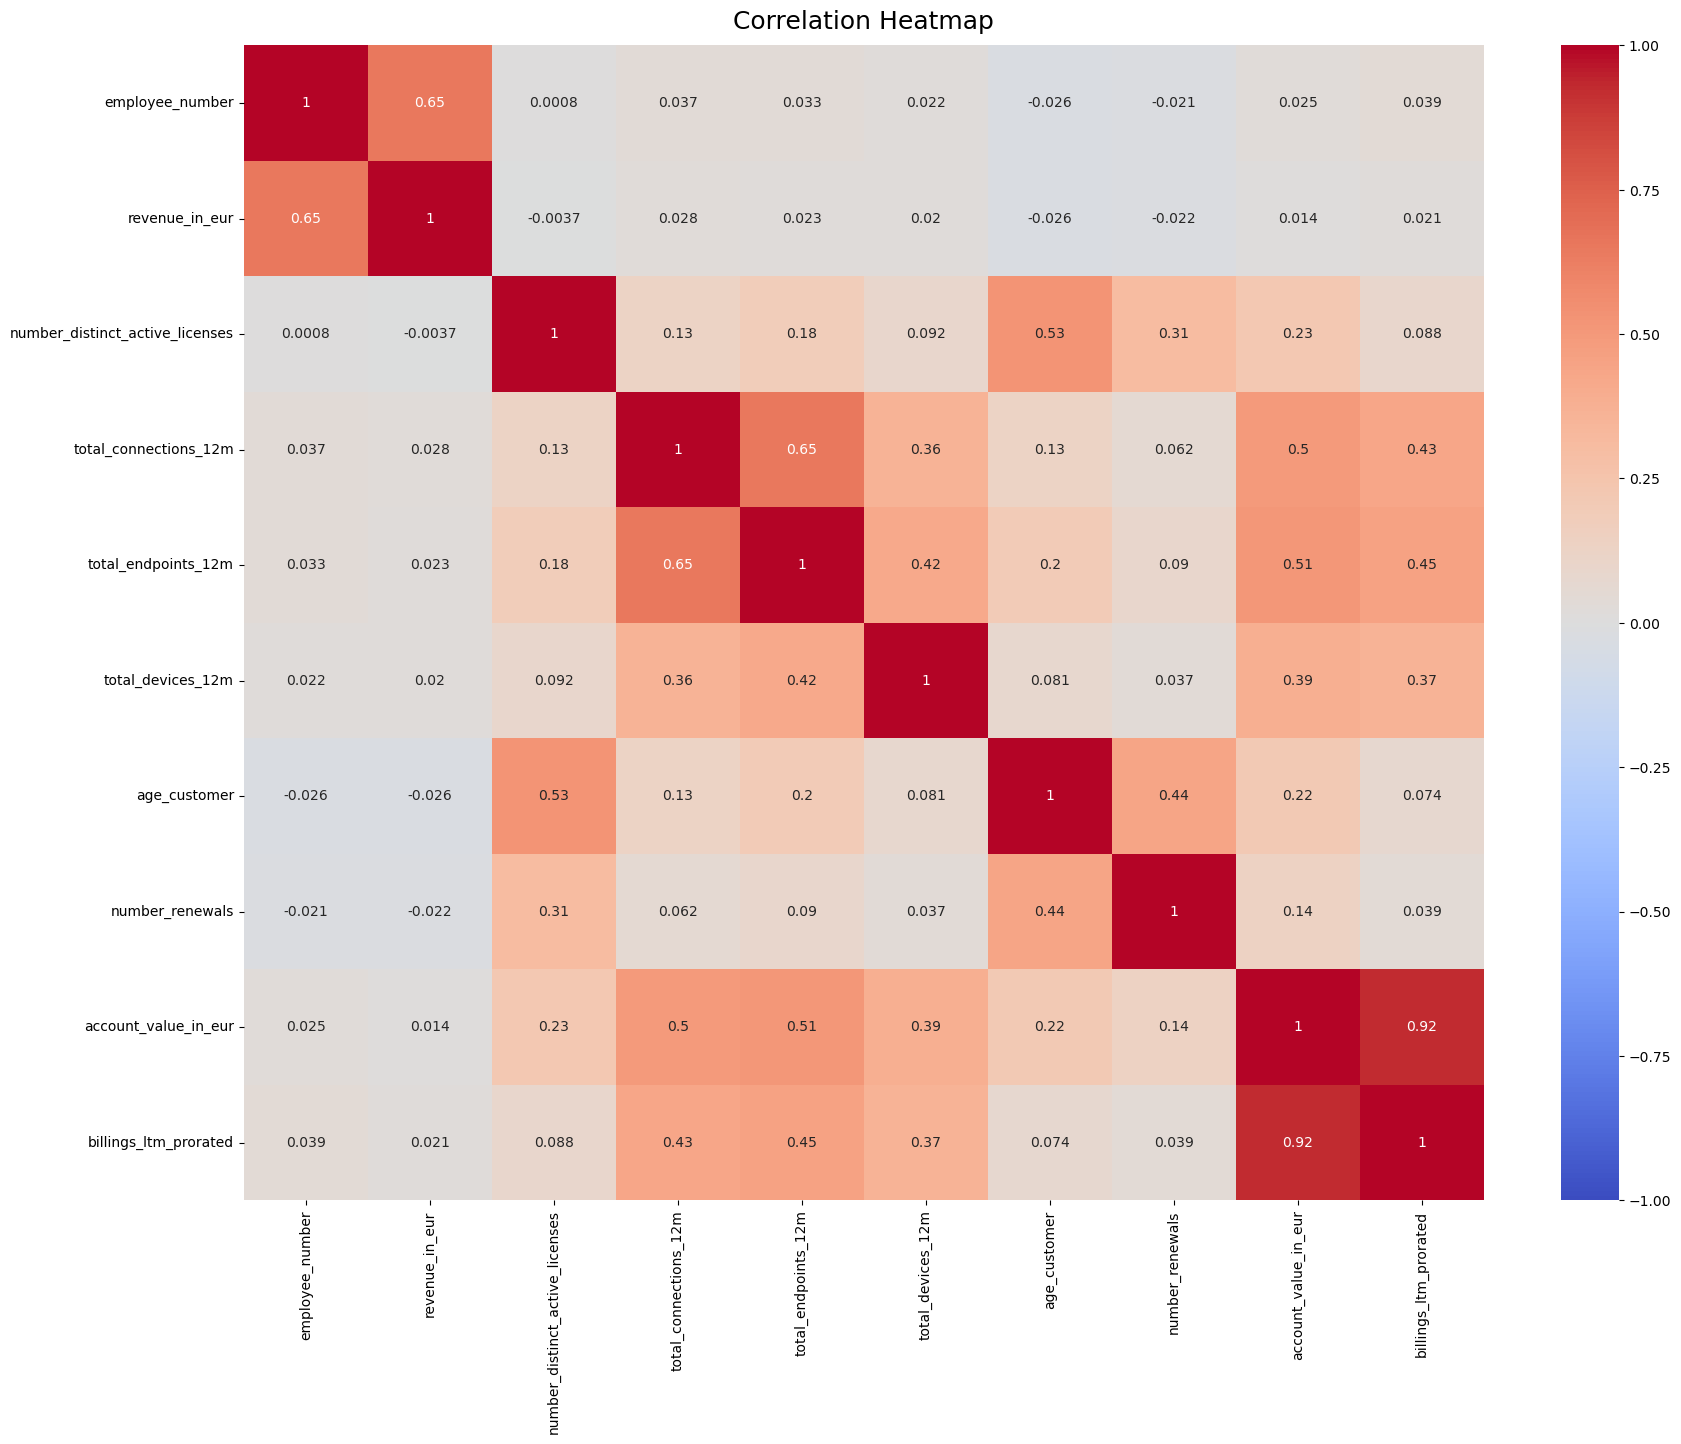

In [134]:
# Compute the correlation matrix
correlation_matrix = normalized_df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(20,15))
heatmap = sns.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

In [135]:
usage_value_cols = ['total_endpoints_12m',
                    'total_connections_12m']

# Create the new column by averaging the columns
normalized_df['usage_value_score'] = normalized_df[usage_value_cols].mean(axis=1)

normalized_df.drop(columns=usage_value_cols, inplace=True)

In [136]:
customer_value_cols = ['age_customer', 
                      'number_distinct_active_licenses',
                      'number_renewals']

# Create the new column by averaging the normalized columns
normalized_df['customer_value_score'] = normalized_df[customer_value_cols].mean(axis=1)

normalized_df.drop(columns=customer_value_cols, inplace=True)

In [137]:
company_dimension_cols = ['revenue_in_eur',
                          'employee_number']

# Create the new column by averaging the columns
normalized_df['company_dimension'] = normalized_df[company_dimension_cols].mean(axis=1)

normalized_df.drop(columns=company_dimension_cols, inplace=True)

In [138]:
normalized_df.drop(columns=['account_value_in_eur'], inplace=True)

Text(0.5, 1.0, 'Correlation Heatmap')

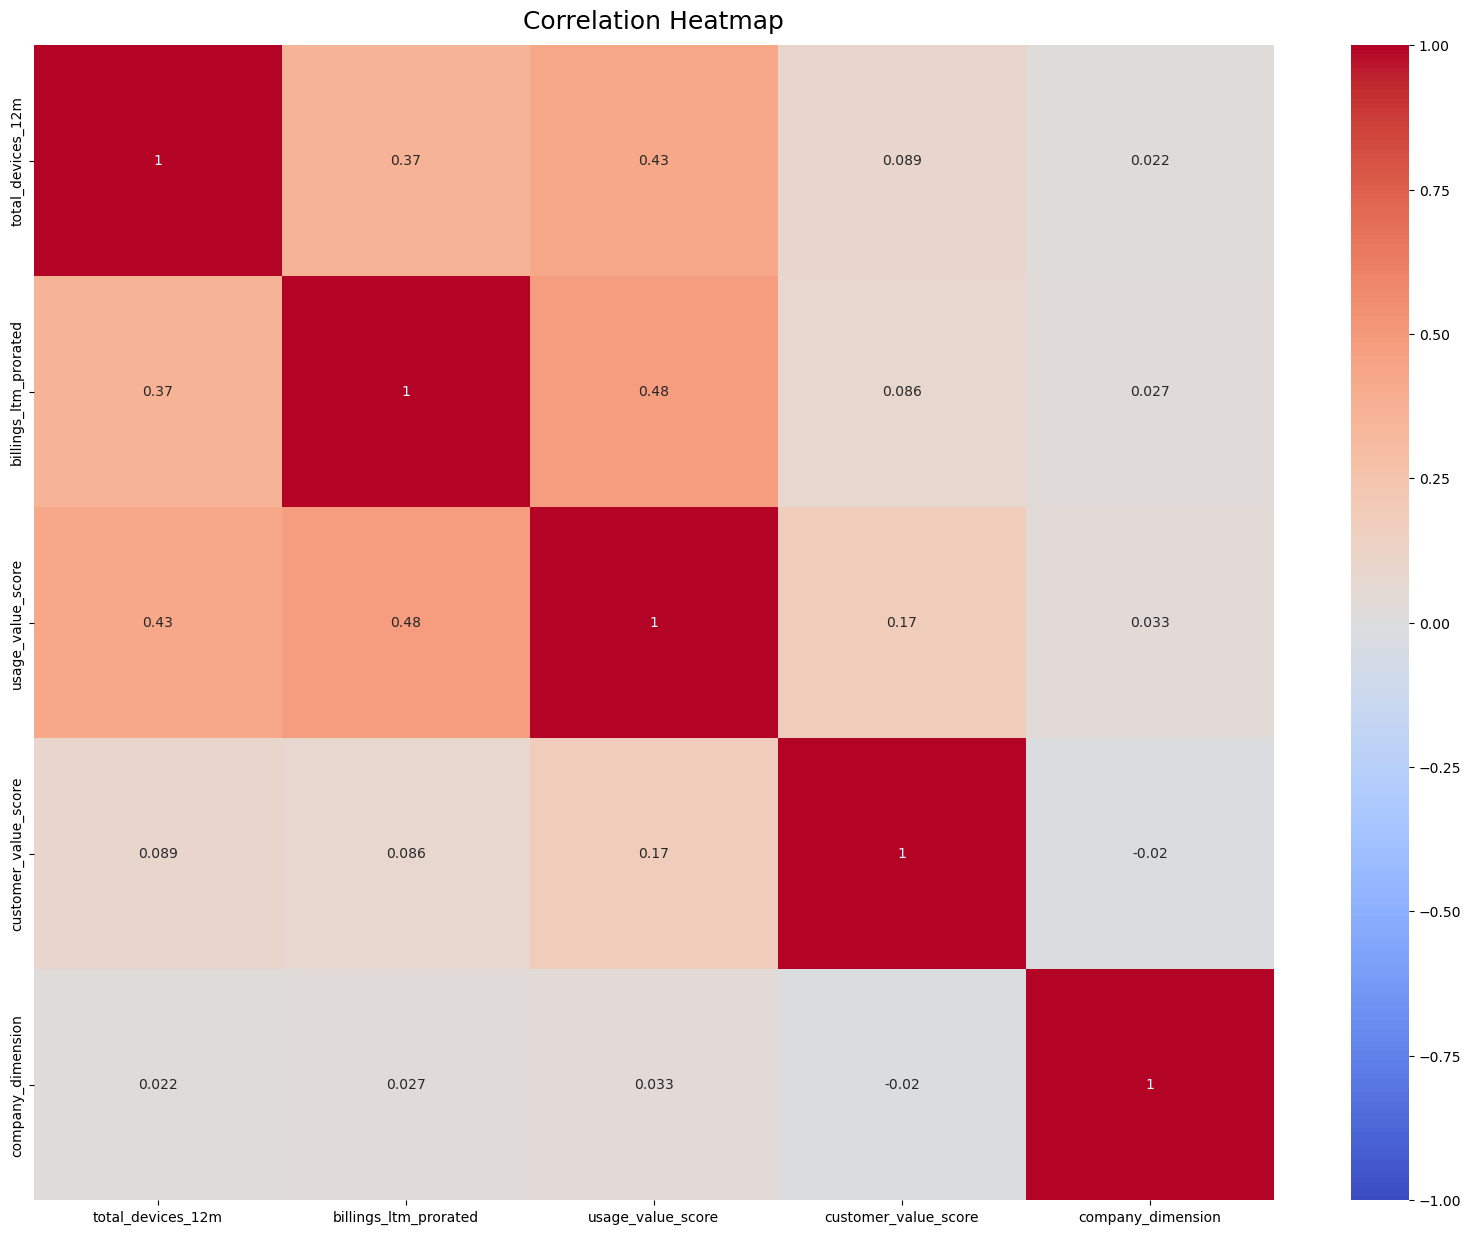

In [139]:
# Compute the correlation matrix
correlation_matrix = normalized_df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(20,15))
heatmap = sns.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

In [140]:
normalized_df.head(10)

,total_devices_12m,billings_ltm_prorated,usage_value_score,customer_value_score,company_dimension
0,-0.230769,-0.063618,-0.241794,0.166667,0.035376
1,3.538462,0.532292,1.660225,-0.666667,0.121739
2,-0.230769,-0.522566,-0.265997,-0.500000,1.362674
3,1.923077,0.668888,1.184481,0.888889,1.103282
4,2.000000,1.263644,4.606537,0.277778,11.545152
5,0.000000,-0.378987,-0.036160,0.000000,0.683832
6,0.153846,0.373029,1.763127,4.000000,0.314202
7,-0.076923,-0.363386,1.601976,0.611111,28.737440
8,100.461538,10.136679,22.710898,0.888889,-0.076263
9,0.769231,0.928293,3.875999,0.888889,0.571699


In [141]:
# Convert DataFrame to numpy array
features = normalized_df.to_numpy()

In [142]:
# Define a range of k values to test
k_range = range(1, 20)

wcss = []
for k in k_range:
    print('Now on k {}'.format(k))
    kmeans = KMeans(n_clusters=k, random_state=0).fit(features)
    wcss.append(kmeans.inertia_)

Now on k 1
Now on k 2
Now on k 3
Now on k 4
Now on k 5
Now on k 6
Now on k 7
Now on k 8
Now on k 9
Now on k 10
Now on k 11
Now on k 12
Now on k 13
Now on k 14
Now on k 15
Now on k 16
Now on k 17
Now on k 18
Now on k 19


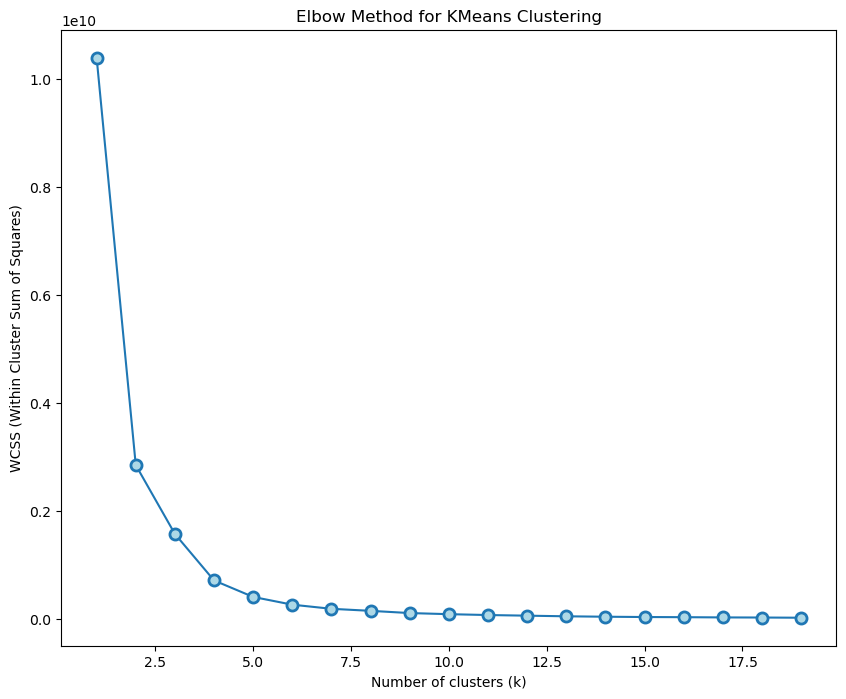

In [143]:
# Plotting WCSS vs k to identify the elbow point
plt.figure(figsize=(10, 8))
plt.plot(k_range, wcss, 'o-', markerfacecolor='lightblue', markeredgewidth=2, markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Within Cluster Sum of Squares)')
plt.title('Elbow Method for KMeans Clustering')
plt.show()

In [144]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(features)
cluster_labels = kmeans.labels_
cluster_df = normalized_df.copy()
cluster_df['cluster_kmeans'] = kmeans.predict(features)
cluster_df.groupby(['cluster_kmeans']).mean()

,total_devices_12m,billings_ltm_prorated,usage_value_score,customer_value_score,company_dimension
cluster_kmeans,,,,,
0,1.255123,0.661657,1.152853,0.270538,6.394411
1,4.197802,0.871493,6.647014,-0.280159,9760.307210
2,13.307692,-0.202028,-0.028234,-0.500000,45044.186162
3,4.555831,4.299909,2.910822,0.064875,2550.980648


In [145]:
cluster_df.cluster_kmeans.value_counts()

0    99774
3      155
1       70
2        1
Name: cluster_kmeans, dtype: int64

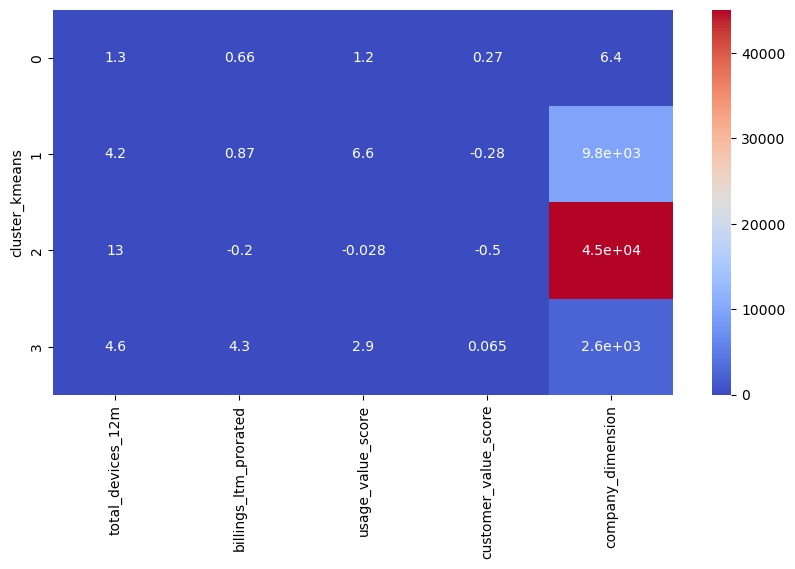

In [146]:
# Visualize the correlation matrix
plt.figure(figsize=(10,5))
sns.heatmap(cluster_df.groupby(['cluster_kmeans']).mean(), cmap='coolwarm', annot=True)
plt.show()

In [147]:
clusters=pd.DataFrame(features, columns=normalized_df.columns)
clusters['label']=kmeans.labels_
polar=clusters.groupby("label").mean().reset_index()
polar=pd.melt(polar,id_vars=["label"])
fig = px.line_polar(polar, r="value", theta="variable", color="label", line_close=True,height=800,width=1400)
fig.show()

c:\Users\luis\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

c:\Users\luis\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

c:\Users\luis\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

c:\Users\luis\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

